In [10]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

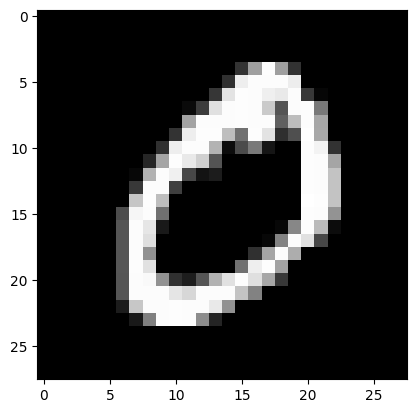

In [12]:
plt.imshow(X_train[1], cmap='gray')
plt.show()

In [13]:
# Tensorflow can handle format : (batch, height, width, channel)

features_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
features_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [14]:
features_train = features_train.astype('float32')
features_test = features_test.astype('float32')

In [15]:
features_train /= 255
features_test /= 255

In [16]:
targets_train = to_categorical(y_train,10)
targets_test = to_categorical(y_test,10)

In [17]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 601,450 (2.29 MB)

 Trainable params: 598,186 (2.28 MB)

 Non-trainable params: 3,264 (12.75 KB)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(features_train, targets_train, batch_size=128, epochs=5, validation_data=(features_test, targets_test), verbose=1)

score = model.evaluate(features_test, targets_test)

print('Test Accuracy: %.2f' % score[1])

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_generator = ImageDataGenerator(rotation_range=7, width_shift_range=0.05, shear_range=0.05, height_shift_range=0.07, zoom_range=0.05)

test_generator = ImageDataGenerator()

train_generator = train_generator.flow(features_train, targets_train, batch_size=64)
test_generator = test_generator.flow(features_test, targets_test, batch_size=64)

model.fit(train_generator, steps_per_epoch=60000//64, epochs=5,
                  validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5


C:\Users\Admin\keras\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 61s 61ms/step - accuracy: 0.9247 - loss: 0.2520 - val_accuracy: 0.9906 - val_loss: 0.0295
Epoch 2/5
  1/937 ━━━━━━━━━━━━━━━━━━━━ 45s 49ms/step - accuracy: 1.0000 - loss: 0.0107

C:\Users\Admin\keras\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0107 - val_accuracy: 0.9905 - val_loss: 0.0312
Epoch 3/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.9830 - loss: 0.0556 - val_accuracy: 0.9867 - val_loss: 0.0369
Epoch 4/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0044 - val_accuracy: 0.9875 - val_loss: 0.0359
Epoch 5/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 50s 53ms/step - accuracy: 0.9848 - loss: 0.0495 - val_accuracy: 0.9920 - val_loss: 0.0245
